In [1]:
import os
from os.path import join, pardir, curdir
import glob
import numpy as np
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

# Set current directory to "src"
os.chdir(join(os.getcwd(), os.pardir, "src"))
print(f"Current working directory: {os.getcwd()}")

from feature_extractor import *
from process import *

Current working directory: /home/fa926284/Documents/Parkinson_FOG_Detection/src


In [2]:
DATA_PATH = join(pardir, 'data', 'train')
DATASET = 'defog'                        # ['tdcsfog', 'defog']
# DATASET = 'tdcsfog'


In [3]:
file_dirs = glob.glob(join(DATA_PATH, DATASET, "*.csv"))


In [4]:
# df = pd.concat((pd.read_csv(f) for f in file_dirs), ignore_index=True)
# df = df[(df['Valid'] == True) & (df['Task'] == True)]

# print("Shape: ", df.shape, end="\n\n")
# print("Columns: ", df.columns, end="\n\n")
# print(df['StartHesitation'].value_counts(), end="\n\n")
# print(df['Turn'].value_counts(), end="\n\n")
# print(df['Walking'].value_counts(), end="\n\n")
# print(df.head(5), end="\n\n")

Shape:  (59298, 8)

Columns:  Index(['index', 'Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn',
       'Walking'],
      dtype='object')

StartHesitation
0    59298
Name: count, dtype: int64

Turn
0    40326
1    18972
Name: count, dtype: int64

Walking
0    59298
Name: count, dtype: int64

   index  Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking
0   1000  1000 -0.828125  0.140340 -0.640625                0     0        0
1   1001  1001 -0.828125  0.140625 -0.640625                0     0        0
2   1002  1002 -0.842366  0.154866 -0.626384                0     0        0
3   1003  1003 -0.843750  0.156250 -0.638434                0     0        0
4   1004  1004 -0.843750  0.156250 -0.640625                0     0        0



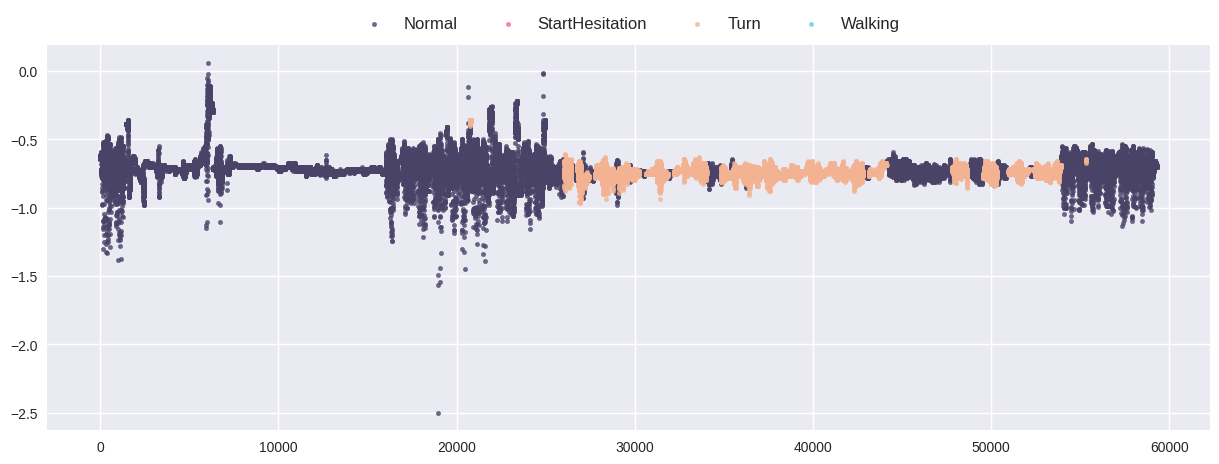

0.1470658416974338
0.0
0.009787575953858246
0.0


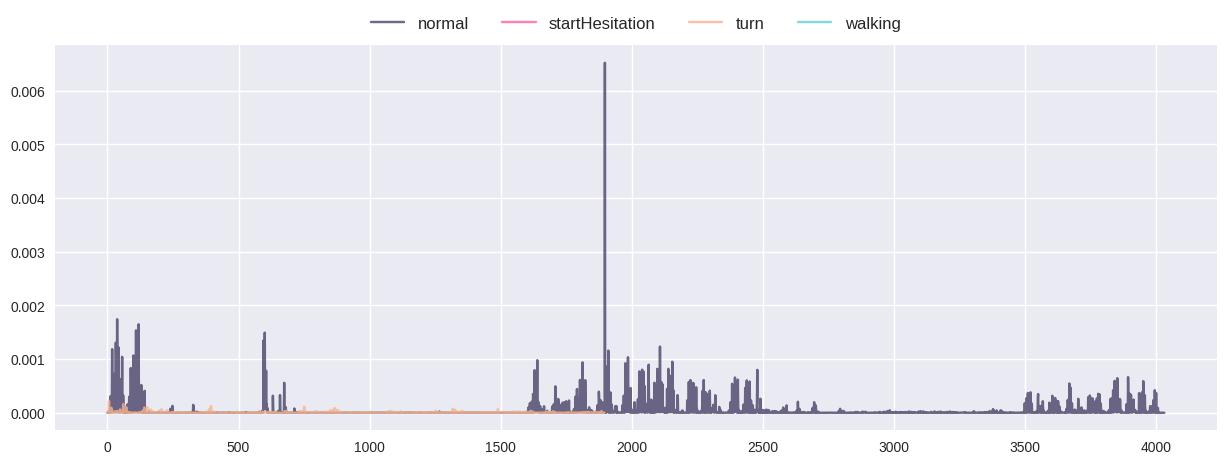

In [5]:
# df = pd.read_csv(file_dirs[1])
df = pd.read_csv("../data/train/defog/2c12284ed2.csv")
if DATASET == 'defog':
    df = df[(df['Valid'] == True) & (df['Task'] == True)]
    df = df.drop(['Valid', 'Task'], axis=1).reset_index()
    # df = df[20000:]

print("Shape: ", df.shape, end="\n\n")
print("Columns: ", df.columns, end="\n\n")
print(df['StartHesitation'].value_counts(), end="\n\n")
print(df['Turn'].value_counts(), end="\n\n")
print(df['Walking'].value_counts(), end="\n\n")
print(df.head(5), end="\n\n")


plt.style.use('seaborn-v0_8')
# plt.rcParams['font.family'] = "Arial"  # "Bahnschrift"
plt.rcParams['figure.figsize'] = 15, 5

normal_mask = (df['StartHesitation'] == 0) & (df['Turn'] == 0) & (df['Walking'] == 0)
normal = df.loc[normal_mask]
startHesitation = df.loc[df['StartHesitation'] == 1]
turn = df.loc[df['Turn'] == 1]
walking = df.loc[df['Walking'] == 1]

channel = 'AccAP'

fig, ax = plt.subplots()
ax.scatter(normal.index, normal[channel],
           s=10, 
           alpha=0.8,
           color='#494368',
           label='Normal')
ax.scatter(startHesitation.index, startHesitation[channel],
           s=10,
           alpha=0.8,
           c='#FC60A8',
           label='StartHesitation')
ax.scatter(turn.index, turn[channel],
           s=10,
           alpha=0.8,
           c='#F4B393',
           label='Turn')
ax.scatter(walking.index, walking[channel],
           s=10,
           alpha=0.8,
           c='#66CED6',
           label='Walking')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), fontsize=12,
           loc="lower center", borderaxespad=0, ncol=5)
plt.show()

_, psd = sp.signal.welch(normal['AccAP'].to_numpy(), 128, nperseg=20, axis=1)
print(psd.sum())
plt.plot(psd, alpha=0.8,
         color='#494368',
         label='normal')
_, psd = sp.signal.welch(
    startHesitation['AccAP'].to_numpy(), 128, nperseg=20, axis=1)
print(psd.sum())
plt.plot(psd, alpha=0.8,
         c='#FC60A8',
         label='startHesitation')
_, psd = sp.signal.welch(turn['AccAP'].to_numpy(), 128, nperseg=20, axis=1)
print(psd.sum())
plt.plot(psd, alpha=0.8,
         c='#F4B393',
         label='turn')
_, psd = sp.signal.welch(walking['AccAP'].to_numpy(), 128, nperseg=20, axis=1)
print(psd.sum())
plt.plot(psd, alpha=0.8,
         c='#66CED6',
         label='walking')
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), fontsize=12,
           loc="lower center", borderaxespad=0, ncol=5)

plt.show()


0.15585899331898373


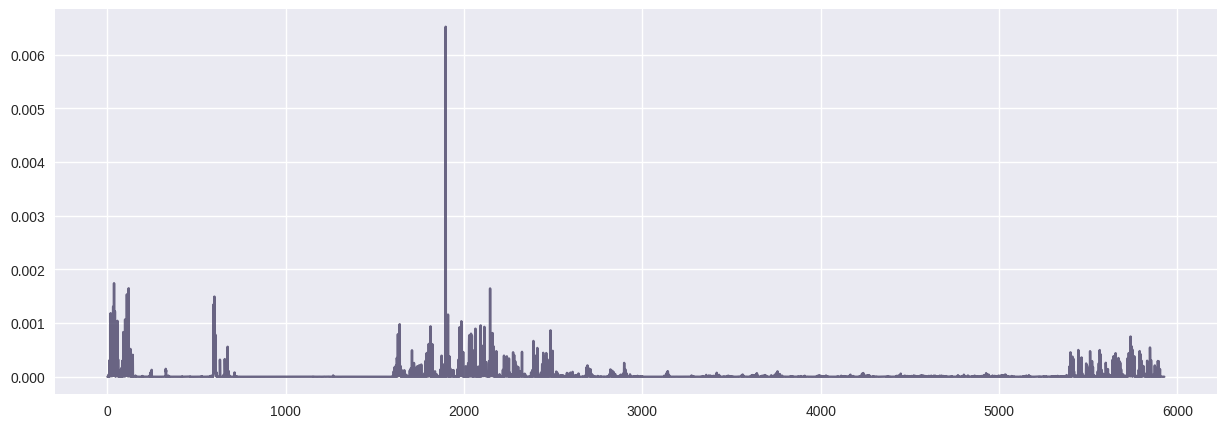

In [6]:
_, psd = sp.signal.welch(df['AccAP'].to_numpy(), 128, nperseg=20, axis=1)
print(psd.sum())
plt.plot(psd, alpha=0.8,
         color='#494368',
         label='normal')


In [7]:
df['label'] = (df['StartHesitation'] * 1) | (df['Turn'] * 2) | (df['Walking'] * 3)
df['label'].value_counts()


label
0    40326
2    18972
Name: count, dtype: int64

In [8]:
acc_ap_win, label = get_windowed_data(df['AccAP'].to_numpy(), 
                                      df['label'].to_numpy(),
                                      win_len=100, slide_frac=0.5)
acc_v_win, _ = get_windowed_data(df['AccV'].to_numpy(),
                                 df['label'].to_numpy(),
                                 win_len=100, slide_frac=0.5)
acc_ml_win, _ = get_windowed_data(df['AccML'].to_numpy(),
                                  df['label'].to_numpy(),
                                  win_len=100, slide_frac=0.5)
acc_ap_win.shape, label.shape

((1184, 100), (1184,))

In [9]:
acc_ap_stat = get_stat_features(acc_ap_win, prefix='AccAP')
acc_v_stat = get_stat_features(acc_v_win, prefix='AccV')
acc_ml_stat = get_stat_features(acc_ml_win, prefix='AccML')
acc_ap_freq = get_freq_features(acc_ap_win, axis=1, fs=128, nperseg=20, prefix='AccAP')
acc_v_freq = get_freq_features(acc_v_win, axis=1, fs=128, nperseg=20, prefix='AccV')
acc_ml_freq = get_freq_features(acc_ml_win, axis=1, fs=128, nperseg=20, prefix='AccML')

X = pd.concat([acc_ap_stat,
                    acc_v_stat,
                    acc_ml_stat,
                    acc_ap_freq,
                    acc_v_freq,
                    acc_ml_freq], axis=1)


/home/fa926284/Documents/Parkinson_FOG_Detection/src/feature_extractor.py:56: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skw = sp.stats.skew(x, axis=axis)
/home/fa926284/Documents/Parkinson_FOG_Detection/src/feature_extractor.py:57: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kut = sp.stats.kurtosis(x, axis=axis)


In [23]:
X.shape

(1185, 66)

In [71]:
df.shape

(59298, 9)

In [72]:
df.dropna().shape


(59298, 9)

In [66]:
if (acc_ap_freq.isna().sum().sum()) > 0:
    NaN_columnName = acc_ap_freq.columns[acc_ap_freq.isna(
    ).any()].tolist()
    # raise ValueError(
    #     f'NaN detected while calculating freq features - {NaN_columnName}')
NaN_columnName


['AccAP_ent', 'AccAP_ctf', 'AccAP_skw', 'AccAP_kut']

In [64]:
acc_ap_freq['AccAP_ent']


0       1.137479
1       1.324932
2       1.367923
3       1.258445
4       1.261781
          ...   
1179    1.310464
1180    1.325904
1181    1.575152
1182    1.647781
1183    2.017058
Name: AccAP_ent, Length: 1184, dtype: float64

In [36]:
X.shape, label.shape

((260, 66), (260,))